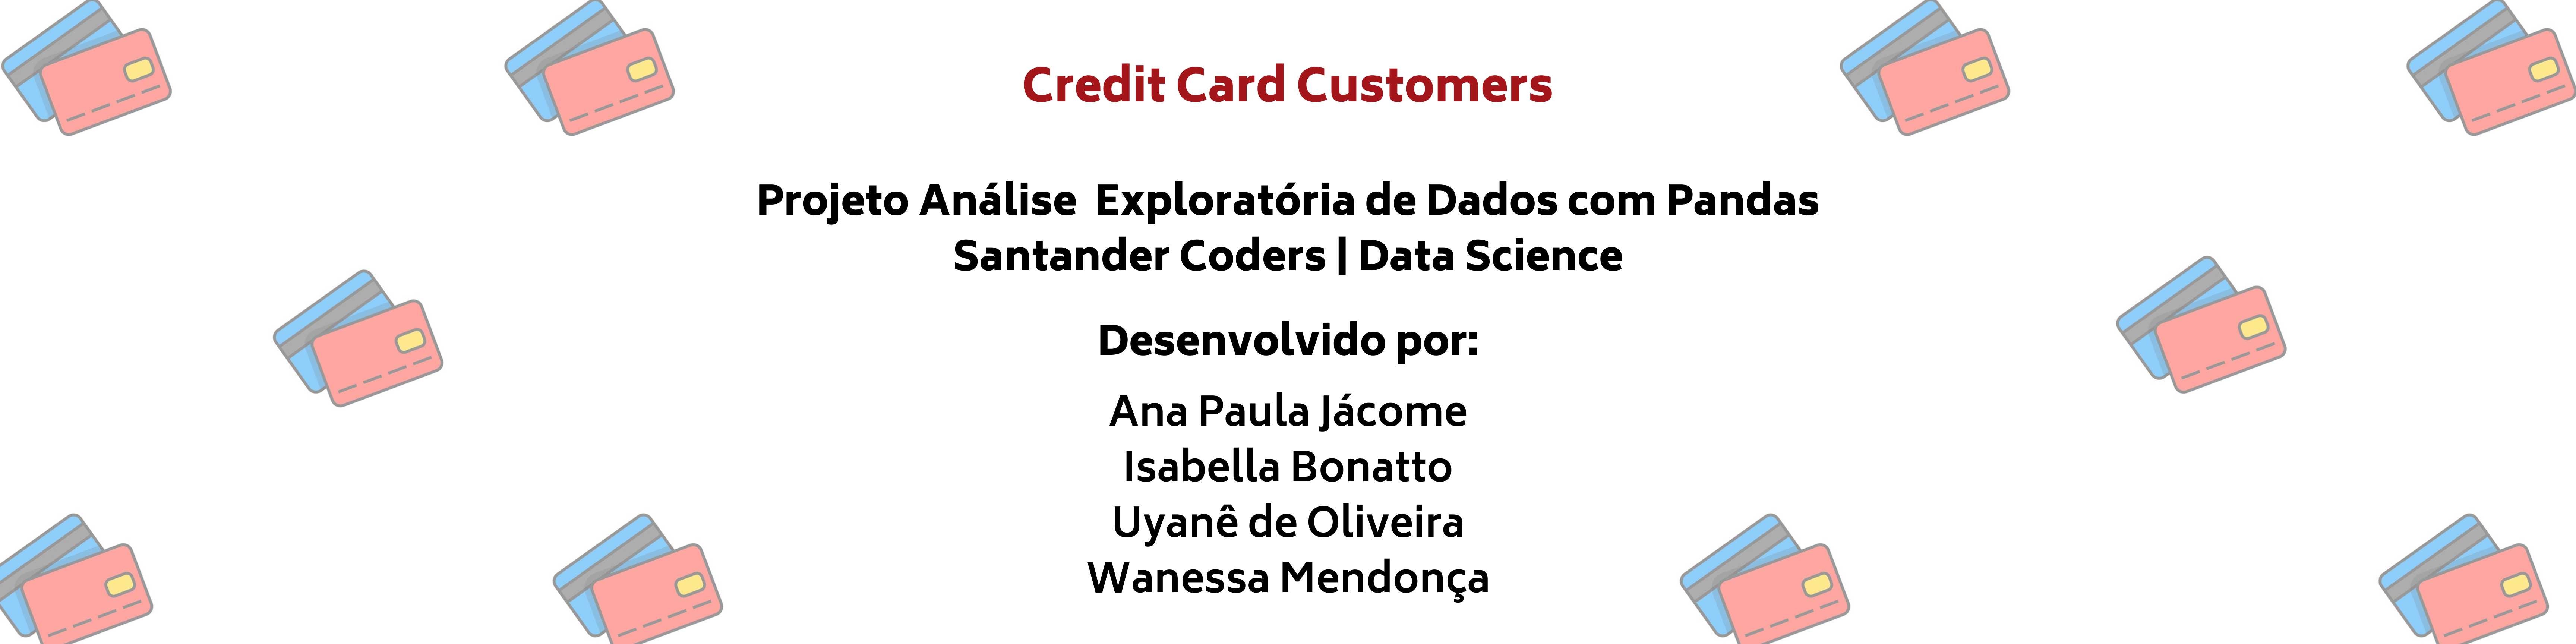


# Contextualização

Neste projeto utilizamos a base de dados [Credit Card Customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers), disponível na plataforma Kaggle. Este *dataset* geralmente é utilizado para a previsão de churning de clientes - processo no qual o cliente se torna desistente do consumo de algum serviço. 

O conjunto de dados original foi retirado do site [LEAPS](https://leaps.analyttica.com/), uma plataforma que disponibiliza diversos bancos de dados a fim de que os usuários possam utilizá-los para praticar a resolução dos mais variados problemas de negócios.

Segundo informações disponilizadas pelo Kaggle em 22 de novembro de 2021, o *dataset* contém dados sobre 10 mil clientes, dentre os quais: idade, salário, estado civil, limite de crédito, etc.

Para estes dados, tem-se que aproximadamente 16,07% dos clientes desistiram do serviço de cartão de crédito.


# Dicionário de dados

Nome da coluna|Descrição dos dados|Tipo de variável
:-------------|:-----------------|:---
CLIENTNUM|Identificador único para cada cliente da base de dados|Categórica
Attrition_Flag|Se o cliente está ou não com uma conta ativa (se 1, a conta foi fechada, senão 0)|Categórica
Customer_Age|Idade do cliente|Discreta
Gender|Sexo do cliente|Nominal
Dependent_count|Número de dependentes do cliente|Discreta
Education_Level|Nível educacional do cliente|Ordinal
Marital_Status|Estado civil do cliente|Nominal
Income_Category|Categoria de renda na qual o cliente se encontra (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)|Intervalos
Card_Category|Tipo de cartão do cliente (Blue, Silver, Gold, Platinum)|Ordinal
Months_on_book|Período de relacionamento do cliente com o banco (em meses)|Discreta
Total_Relationship_Count|Total de produtos do banco que o cliente possui|Discreta
Months_Inactive_12_mon|Número de meses que o cliente permaneceu inativo|Discreta
Contacts_Count_12_mon|Número de contatos nos últimos 12 meses|Discreta
Credit_Limit|Limite do cartão de crédito|Contínua
Total_Revolving_Bal|Média da quantidade gasta no cartão por mês|Contínua
Avg_Open_To_Buy|Média de limite comprado nos últimos doze meses (reajuste do limite)|Contínua
Total_Amt_Chng_Q4_Q1|Comparação entre o uso do cartão nos 4 últimos meses do ano com os 4 primeiros meses do ano (em quantia)|Contínua
Total_Trans_Amt|Total de transferências nos últimos 12 meses (em quantia)|Contínua
Total_Trans_Ct|Total de transferências nos últimos 12 meses (em número de transações)|Discreta
Total_Ct_Chng_Q4_Q1|Comparação entre o uso do cartão nos 4 últimos meses do ano com os 4 primeiros meses do ano (em número de transações)|Contínua
Avg_Utilization_Ratio|Razão média de uso do cartão (Rotativo/Limite de crédito)|Contínua



# Importação de bibliotecas 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import warnings
import seaborn as sns
import math

# Carregando base de dados e visualizando atributos

In [3]:
df_original = pd.read_csv("BankChurners.csv", sep=',')

In [4]:
df_original.shape

(10127, 23)

In [5]:
df_original.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

O Kaggle, na página de divulgação do presente *dataset*, aconselha aos usuários a retirada das duas últimas colunas, uma vez que não apresentam grande importância frente aos outros dados.

In [6]:
df = df_original.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


# Análise inicial da base

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [11]:
#verificando dados nulos
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Uma verificação mais detalhada para os dados contidas em algumas das colunas foi realizada:

### Verificação para a coluna "Attriction_Flag"

In [12]:
list(df['Attrition_Flag'].value_counts(dropna=False));

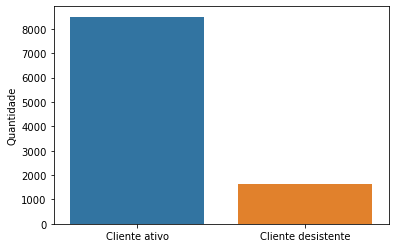

In [13]:
attr_values = sns.barplot(x=df['Attrition_Flag'].unique(), y=list(df['Attrition_Flag'].value_counts(dropna=False)), data=df);
plt.ylabel("Quantidade");
#plt.xticks(ticks=["Existing Customer", "Attrited Customer"], labels=["Cliente ativo", "Cliente desistente"])
attr_values.set_xticklabels(["Cliente ativo", "Cliente desistente"], fontsize=10);

Confirmando a informação que foi dispobilizada pela página de apresentação dos dados, temos para esta base, um número de clientes ativos maior do que o número de clientes desistentes.

### Verificação para a coluna "Customer_Age"

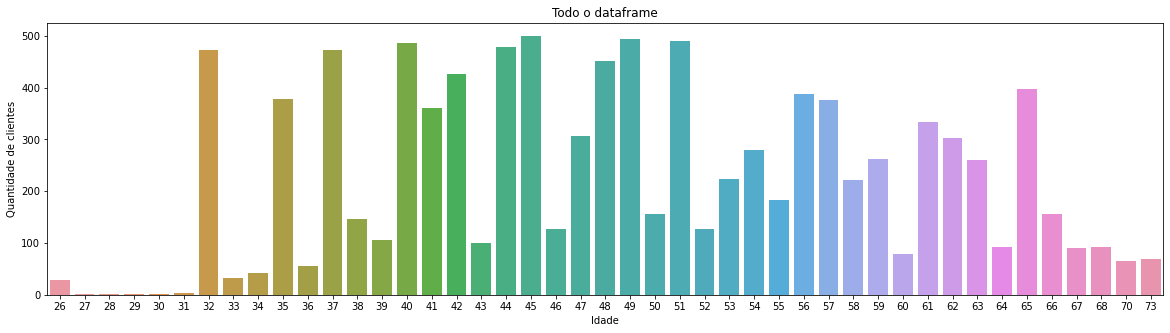

In [14]:
plt.figure(figsize=(20,5))
attr_values = sns.barplot(x=df['Customer_Age'].unique(), y=list(df['Customer_Age'].value_counts(dropna=False)), data=df);
plt.ylabel("Quantidade de clientes");
plt.title("Todo o dataframe");
plt.xlabel("Idade");

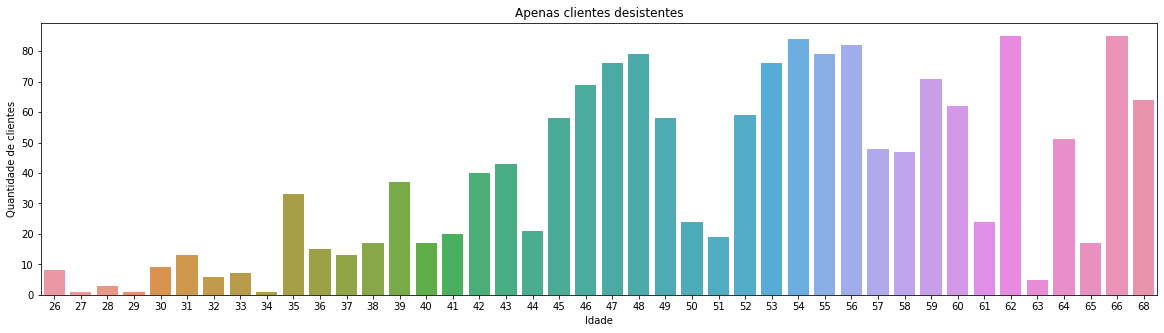

In [15]:
plt.figure(figsize=(20,5))
attr_values = sns.barplot(x=df[df['Attrition_Flag'] == 'Attrited Customer']['Customer_Age'].unique(), y=list(df[df['Attrition_Flag'] == 'Attrited Customer']['Customer_Age'].value_counts(dropna=False)), data=df);
plt.ylabel("Quantidade de clientes");
plt.title("Apenas clientes desistentes");
plt.xlabel("Idade");

Agrupando por faixas etárias:

In [21]:
df_age = pd.DataFrame(df[['Customer_Age', 'Attrition_Flag']].copy())

In [31]:
df_age['cut_bins'] = pd.cut(df_age['Customer_Age'], 4)
df_age['cut_classes'] = pd.cut(df_age['Customer_Age'], 4, labels=["jovens", "adultos", "meia-idade", "idosos"])
df_age.head();

In [32]:
df_age['cut_bins'].unique();

In [25]:
classes = ["< 20","20-29", "30-39", "40-49", "50-59", "60-69", "70-79", ">= 80"]

df_age['classe'] = 0
df_age.loc[(df_age['Customer_Age'] < 20), 'classe'] = classes[0]
df_age.loc[(df_age['Customer_Age'] >= 20) & (df_age['Customer_Age'] < 30), 'classe'] = classes[1]
df_age.loc[(df_age['Customer_Age'] >= 30) & (df_age['Customer_Age'] < 40), 'classe'] = classes[2]
df_age.loc[(df_age['Customer_Age'] >= 40) & (df_age['Customer_Age'] < 50), 'classe'] = classes[3]
df_age.loc[(df_age['Customer_Age'] >= 50) & (df_age['Customer_Age'] < 60), 'classe'] = classes[4]
df_age.loc[(df_age['Customer_Age'] >= 60) & (df_age['Customer_Age'] < 70), 'classe'] = classes[5]
df_age.loc[(df_age['Customer_Age'] >= 70) & (df_age['Customer_Age'] < 80), 'classe'] = classes[6]
df_age.loc[(df_age['Customer_Age'] >= 80), 'classe'] = classes[7]

In [26]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

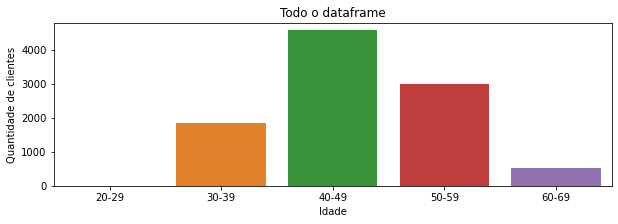

In [27]:
plt.figure(figsize=(10,3))
idade_values = sns.barplot(x=df_age['classe'].unique(), y=list(df_age['classe'].value_counts(dropna=False)), data=df_age, order=classes[1:-2]);
plt.ylabel("Quantidade de clientes");
plt.xlabel("Idade");
plt.title("Todo o dataframe")
add_value_labels(attr_values);

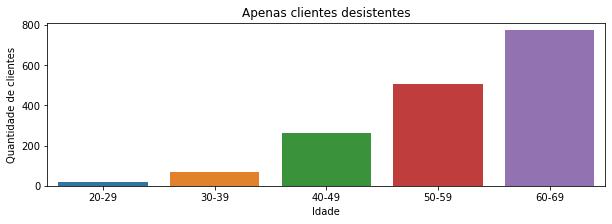

In [28]:
plt.figure(figsize=(10,3))
idade_values = sns.barplot(x=df_age[df_age['Attrition_Flag'] == 'Attrited Customer']['classe'].unique(), y=list(df_age[df_age['Attrition_Flag'] == 'Attrited Customer']['classe'].value_counts(dropna=False)), data=df_age, order=classes[1:-2]);
plt.ylabel("Quantidade de clientes");
plt.xlabel("Idade");
plt.title("Apenas clientes desistentes")
add_value_labels(attr_values);

Foi possível visualizar que os clientes na faixa de 40 a 49 anos compõem a maior parte da base, porém quando nos concentramos apenas nos clientes desistentes, aqueles entre 60 e 69 são maioria.

### Verificação para a coluna "Gender"

In [30]:
pd.DataFrame(df['Gender'].value_counts());

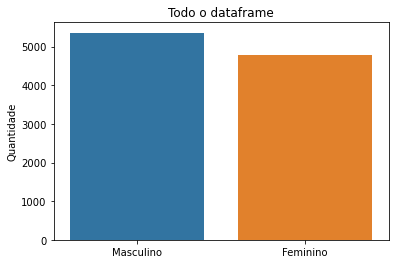

In [33]:
gender_values = sns.barplot(x=df['Gender'].unique(), y=list(df['Gender'].value_counts(dropna=False)), data=df);
plt.ylabel("Quantidade");
plt.title("Todo o dataframe")
gender_values.set_xticklabels(["Masculino", "Feminino"], fontsize=10);

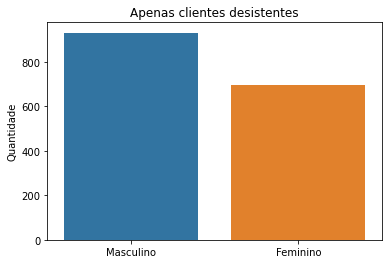

In [34]:
gender_values = sns.barplot(x=df[df['Attrition_Flag'] == 'Attrited Customer']['Gender'].unique(), y=list(df[df['Attrition_Flag'] == 'Attrited Customer']['Gender'].value_counts(dropna=False)), data=df);
plt.ylabel("Quantidade");
plt.title("Apenas clientes desistentes")
gender_values.set_xticklabels(["Masculino", "Feminino"], fontsize=10);

Não foi observada diferença significativa no que se refere ao gênero dos clientes entre a base de dados como um todo e a parte desistente.

### Verificação para a coluna "Dependent_count"	

In [35]:
df['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

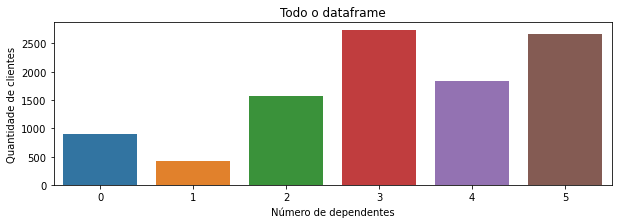

In [38]:
plt.figure(figsize=(10,3))
education_values = sns.barplot(x=df['Dependent_count'].unique(), y=list(df['Dependent_count'].value_counts(dropna=False)), data=df);
plt.title("Todo o dataframe")
plt.ylabel("Quantidade de clientes");
plt.xlabel("Número de dependentes");
#add_value_labels(education_values);

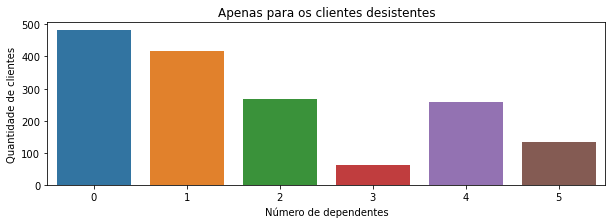

In [66]:
plt.figure(figsize=(10,3))
education_values = sns.barplot(x=df[df['Attrition_Flag'] == 'Attrited Customer']['Dependent_count'].unique(), y=list(df[df['Attrition_Flag'] == 'Attrited Customer']['Dependent_count'].value_counts(dropna=False)), data=df);
plt.title("Apenas para os clientes desistentes")
plt.ylabel("Quantidade de clientes");
plt.xlabel("Número de dependentes");

Foi possível concluir que dentre os clientes que desistiram do serviço de cartão de crédito, boa parte não tinham dependentes.

### Verificação para a coluna "Education_Level"

In [40]:
df['Education_Level'].unique();

In [41]:
df['Education_Level'].value_counts();

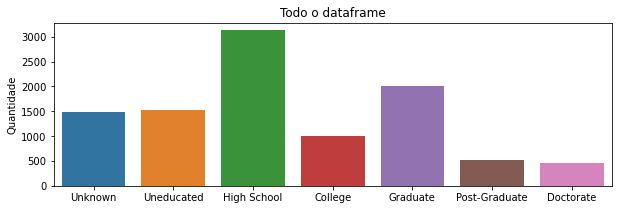

In [42]:
plt.figure(figsize=(10,3))
ordem = ['Unknown', 'Uneducated','High School', 'College','Graduate','Post-Graduate','Doctorate']
education_values = sns.barplot(x=df['Education_Level'].unique(), y=list(df['Education_Level'].value_counts(dropna=False)), data=df, order=ordem);
plt.ylabel("Quantidade");
plt.title("Todo o dataframe");
#add_value_labels(education_values);

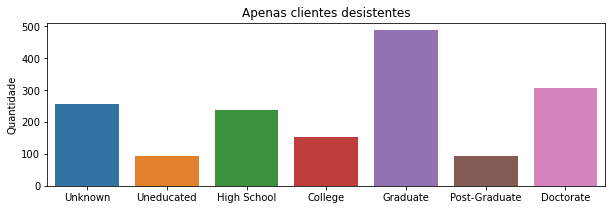

In [43]:
plt.figure(figsize=(10,3))
ordem = ['Unknown', 'Uneducated','High School', 'College','Graduate','Post-Graduate','Doctorate']
education_values = sns.barplot(x=df[df['Attrition_Flag'] == 'Attrited Customer']['Education_Level'].unique(), y=list(df[df['Attrition_Flag'] == 'Attrited Customer']['Education_Level'].value_counts(dropna=False)), data=df, order=ordem);
plt.ylabel("Quantidade");
plt.title("Apenas clientes desistentes");
#add_value_labels(education_values);

No que se refere ao nível educacional, houve uma inversão: para a abse de dados como um todo, são maioria os clientes que possuem o equivalente ao ensino médio. Dentre os clientes desistentes, os que possuem graduação estão presentes em maior número.

### Verificação para a coluna "Marital_Status"

In [44]:
df['Marital_Status'].value_counts(dropna=False)

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

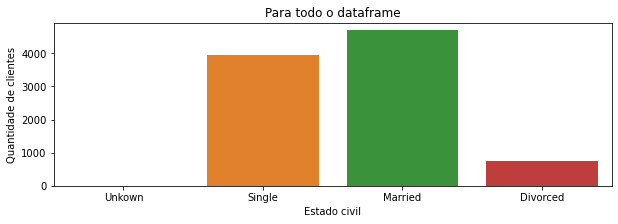

In [47]:
plt.figure(figsize=(10,3))
ordem = ['Unkown', 'Single', 'Married', 'Divorced']
education_values = sns.barplot(x=df['Marital_Status'].unique(), y=list(df['Marital_Status'].value_counts(dropna=False)), data=df, order=ordem);
plt.title("Para todo o dataframe")
plt.ylabel("Quantidade de clientes");
plt.xlabel("Estado civil");
#add_value_labels(education_values);

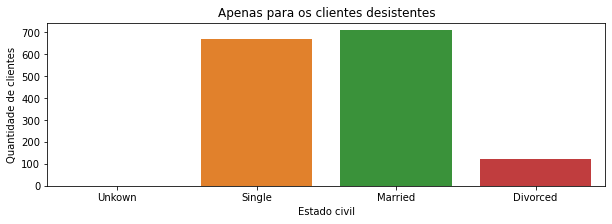

In [65]:
plt.figure(figsize=(10,3))
ordem = ['Unkown', 'Single', 'Married', 'Divorced']
education_values = sns.barplot(x=df[df['Attrition_Flag'] == 'Attrited Customer']['Marital_Status'].unique(), y=list(df[df['Attrition_Flag'] == 'Attrited Customer']['Marital_Status'].value_counts(dropna=False)), data=df, order=ordem);
plt.title("Apenas para os clientes desistentes")
plt.ylabel("Quantidade de clientes");
plt.xlabel("Estado civil");
#add_value_labels(education_values);

No aspecto estado civil, não foi observada nenhuma diferença significativa no perfil dos clientes como um todo e aqueles que foram desistentes.

### Verificação para a coluna "Income_Category"

In [49]:
df['Income_Category'].value_counts(dropna=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

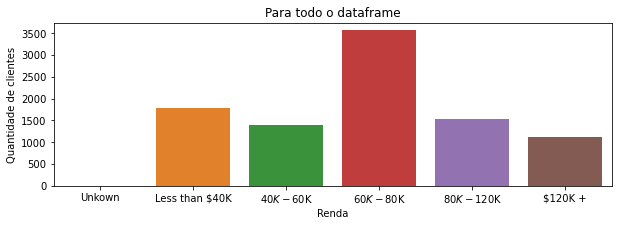

In [58]:
plt.figure(figsize=(10,3))
ordem = ['Unkown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K','$120K +' ]
education_values = sns.barplot(x=df['Income_Category'].unique(), y=list(df['Income_Category'].value_counts(dropna=False)), data=df, order=ordem);
plt.title("Para todo o dataframe")
plt.ylabel("Quantidade de clientes");
plt.xlabel("Renda");
#add_value_labels(education_values);

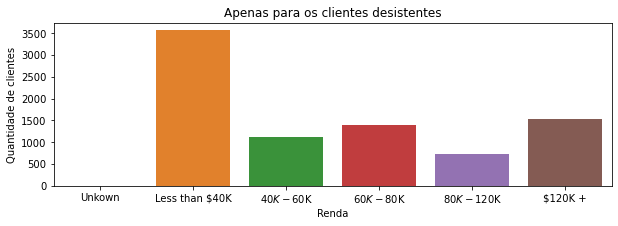

In [59]:
plt.figure(figsize=(10,3))
ordem = ['Unkown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K','$120K +' ]
education_values = sns.barplot(x=df[df['Attrition_Flag'] == 'Attrited Customer']['Income_Category'].unique(), y=list(df['Income_Category'].value_counts(dropna=False)), data=df, order=ordem);
plt.title("Apenas para os clientes desistentes")
plt.ylabel("Quantidade de clientes");
plt.xlabel("Renda");
#add_value_labels(education_values);

Foi observado que os clientes cuja renda está abaixo de 40 mil dólares, tendem a desistir com maior frequência do serviço de cartão de crédito.

### Verificação para a coluna "Card_Category"

In [52]:
df['Card_Category'].value_counts(dropna=False)

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

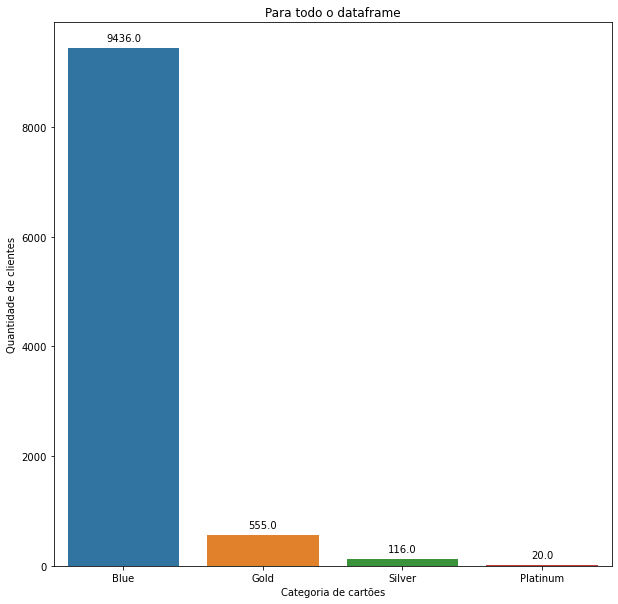

In [60]:
plt.figure(figsize=(10,10))
education_values = sns.barplot(x=df['Card_Category'].unique(), y=list(df['Card_Category'].value_counts(dropna=False)), data=df);
plt.title("Para todo o dataframe")
plt.ylabel("Quantidade de clientes");
plt.xlabel("Categoria de cartões");
add_value_labels(education_values);

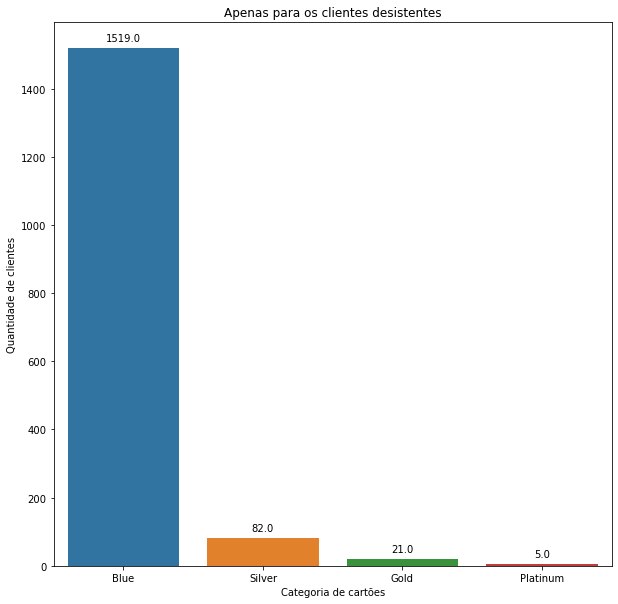

In [64]:
plt.figure(figsize=(10,10))
education_values = sns.barplot(x=df[df['Attrition_Flag'] == 'Attrited Customer']['Card_Category'].unique(), y=list(df[df['Attrition_Flag'] == 'Attrited Customer']['Card_Category'].value_counts(dropna = False)), data=df);
plt.title("Apenas para os clientes desistentes")
plt.ylabel("Quantidade de clientes");
plt.xlabel("Categoria de cartões");
add_value_labels(education_values);

A maior parte da base de clientes é composta por aqueles que possuem o cartão na categoria "Blue", observação que também se reflete dentre os clientes desistentes.

### Verificação para a coluna "Months_on_book" - medição do tempo de relacionamento do cliente com o banco

In [70]:
df['Months_on_book'].unique()

array([39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 37, 56, 42, 49, 33, 28,
       38, 41, 43, 45, 52, 40, 50, 35, 47, 32, 20, 29, 25, 53, 24, 55, 23,
       22, 26, 13, 51, 19, 15, 17, 18, 16, 14], dtype=int64)

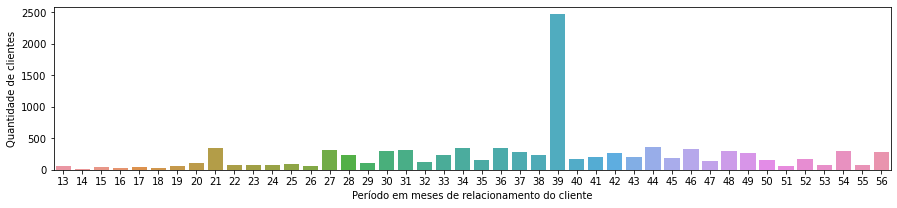

In [71]:
plt.figure(figsize=(15,3))
education_values = sns.barplot(x=df['Months_on_book'].unique(), y=list(df['Months_on_book'].value_counts(dropna=False)), data=df);
plt.ylabel("Quantidade de clientes");
plt.xlabel("Período em meses de relacionamento do cliente");
#add_value_labels(education_values);

#isso é uma amostragem ou o total de clientes do banco?

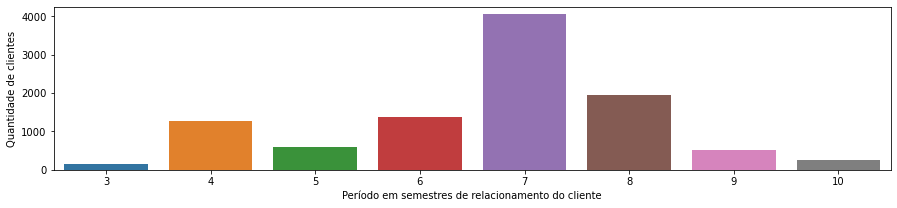

In [72]:
df_meses = pd.DataFrame(df['Months_on_book'].copy())
df_meses['semestre'] = (df['Months_on_book']/6).apply(math.ceil)

plt.figure(figsize=(15,3))
education_values = sns.barplot(x=df_meses['semestre'].unique(), y=list(df_meses['semestre'].value_counts(dropna=False)), data=df_meses);
plt.ylabel("Quantidade de clientes");
plt.xlabel("Período em semestres de relacionamento do cliente");
#add_value_labels(education_values);

### Verificação da coluna "Months_Inactive_12_mon" - medição dos meses de inatividade dos clientes

In [73]:
df['Months_Inactive_12_mon'].value_counts(normalize=True)*100 #/df['Months_Inactive_12_mon'].count()*100

3    37.977683
2    32.408413
1    22.049965
4     4.295448
5     1.757677
6     1.224449
0     0.286363
Name: Months_Inactive_12_mon, dtype: float64

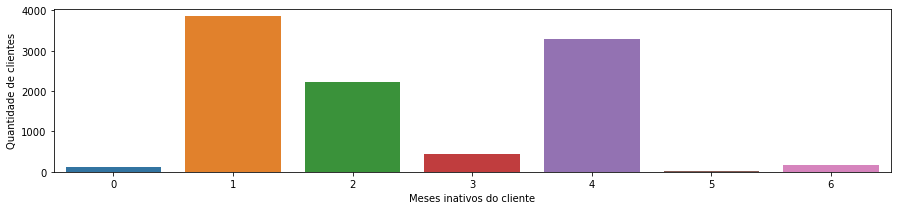

In [74]:
plt.figure(figsize=(15,3))
education_values = sns.barplot(x=df['Months_Inactive_12_mon'].unique(), y=list(df['Months_Inactive_12_mon'].value_counts(dropna=False)), data=df_meses);
plt.ylabel("Quantidade de clientes");
plt.xlabel("Meses inativos do cliente");
#add_value_labels(education_values);

### Verificação para a coluna "Contacts_Count_12_mon" - medição do número de contatos do cliente com o banco

In [75]:
df['Contacts_Count_12_mon'].value_counts()

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

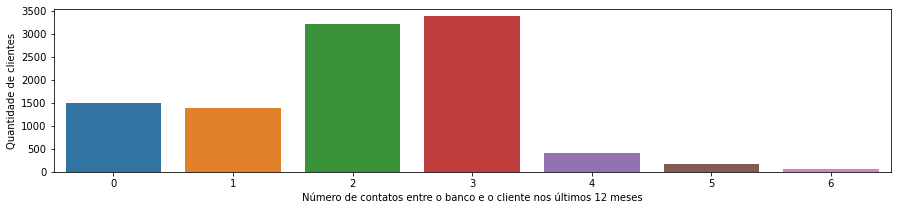

In [76]:
plt.figure(figsize=(15,3))
education_values = sns.barplot(x=df['Contacts_Count_12_mon'].unique(), y=list(df['Contacts_Count_12_mon'].value_counts(dropna=False)), data=df_meses);
plt.ylabel("Quantidade de clientes");
plt.xlabel("Número de contatos entre o banco e o cliente nos últimos 12 meses");
#add_value_labels(education_values);

### Verficação da coluna "Credit_Limit"

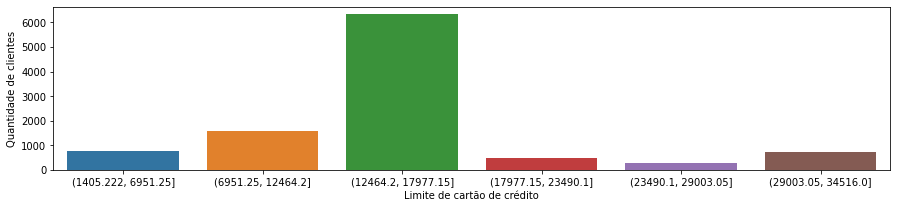

In [ ]:
df_credit = pd.DataFrame(df['Credit_Limit'].copy())
df_credit['Faixas'] = pd.cut(df_credit['Credit_Limit'], 6)
plt.figure(figsize=(15,3))
credit_values = sns.barplot(x=df_credit['Faixas'].unique(), y=list(df_credit['Faixas'].value_counts(dropna=False)), data=df_credit);
plt.ylabel("Quantidade de clientes");
plt.xlabel("Limite de cartão de crédito");
#add_value_labels(education_values);

A maior parte dos clientes possui um limite de crédito que varia entre 12.464 e 17.977 dólares.

### Verificação da coluna "Total_Revolving_Bal" - medição do total do limite gasto (média dos últimos 12 meses)

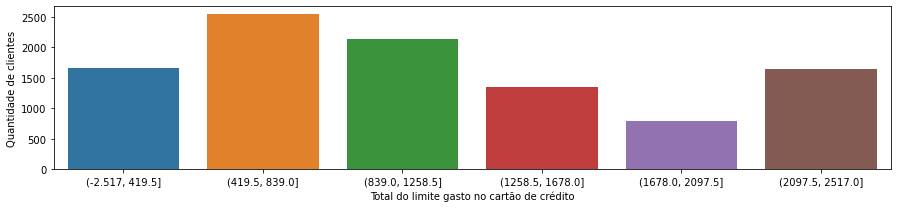

In [77]:
df_revolv = pd.DataFrame(df['Total_Revolving_Bal'].copy())
df_revolv['Faixas'] = pd.cut(df_revolv['Total_Revolving_Bal'], 6)
plt.figure(figsize=(15,3))
credit_values = sns.barplot(x=df_revolv['Faixas'].unique(), y=list(df_revolv['Faixas'].value_counts(dropna=False)), data=df_revolv);
plt.ylabel("Quantidade de clientes");
plt.xlabel("Total do limite gasto no cartão de crédito");
#add_value_labels(education_values);

A maior parte dos clientes gastou entre 419 e 836 dólares no cartão de crédito.

### Verificação da coluna "Avg_Open_To_Buy" - medição do total de limite disponível para ser gasto (média dos últimos 12 meses)

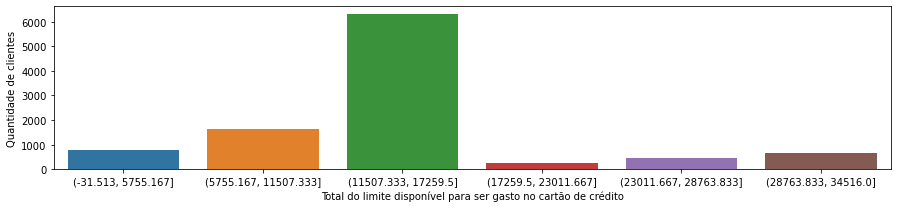

In [78]:
df_avgbuy = pd.DataFrame(df['Avg_Open_To_Buy'].copy())
df_avgbuy['Faixas'] = pd.cut(df_avgbuy['Avg_Open_To_Buy'], 6)
plt.figure(figsize=(15,3))
credit_values = sns.barplot(x=df_avgbuy['Faixas'].unique(), y=list(df_avgbuy['Faixas'].value_counts(dropna=False)), data=df_avgbuy);
plt.ylabel("Quantidade de clientes");
plt.xlabel("Total do limite disponível para ser gasto no cartão de crédito");
#add_value_labels(education_values);

A maior parte dos clientes deixou em aberto um limite entre 11.507 e 17.259 em média para ser gasto.

### Verificação para a coluna "Total_Amt_Chng_Q4_Q1" - relação entre o montante gasto nos 4º  e 1º semestres do ano

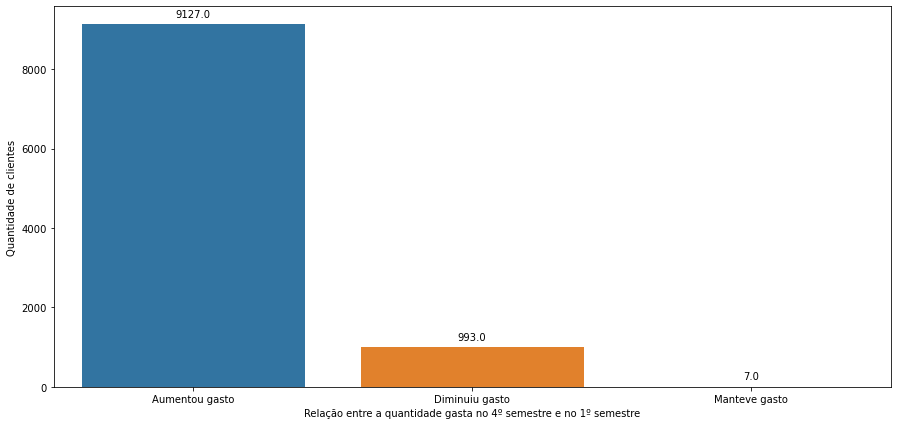

In [84]:
df_q4q1q = pd.DataFrame(df['Total_Amt_Chng_Q4_Q1'].copy())
df_q4q1q['classe'] = 0
df_q4q1q.loc[df_q4q1q['Total_Amt_Chng_Q4_Q1'] > 1, 'classe'] = 'Aumentou gasto'
df_q4q1q.loc[df_q4q1q['Total_Amt_Chng_Q4_Q1'] == 1, 'classe'] = 'Manteve gasto'
df_q4q1q.loc[df_q4q1q['Total_Amt_Chng_Q4_Q1'] < 1, 'classe'] = 'Diminuiu gasto'

plt.figure(figsize=(15,7))
q4q1q_values = sns.barplot(x=df_q4q1q['classe'].unique(), y=list(df_q4q1q['classe'].value_counts(dropna=False)), data=df_q4q1q);
plt.ylabel("Quantidade de clientes");
plt.xlabel("Relação entre a quantidade gasta no 4º semestre e no 1º semestre");
add_value_labels(q4q1q_values);

### Verificação da coluna "Avg_Utilization_Ratio" - média de utilização do cartão

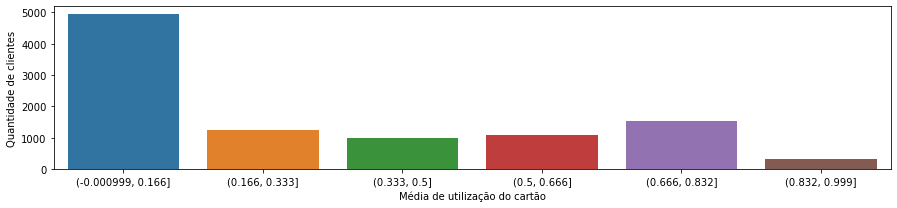

In [85]:
df_avguti = pd.DataFrame(df['Avg_Utilization_Ratio'].copy())
df_avguti['Faixas'] = pd.cut(df_avguti['Avg_Utilization_Ratio'], 6)
plt.figure(figsize=(15,3))
credit_values = sns.barplot(x=df_avguti['Faixas'].unique(), y=list(df_avguti['Faixas'].value_counts(dropna=False)), data=df_avguti);
plt.ylabel("Quantidade de clientes");
plt.xlabel("Média de utilização do cartão");
#add_value_labels(education_values);

A média de utilização do cartão é denotada pela divisão entre a quantidade de crédito em aberto (*Avg_Open_To_Buy*) e o limite de crédito do cliente (*Credit_Limit*). Se este número for igual a 1, por exemplo, significa que o cliente não realizou nenhuma compra no cartão.

A maior parte dos clientes da base deixa até 16,6% do limite aberto para compras, em média, por mês.

In [86]:
# Verificando se realmente não há nenhum dado negativo para esta coluna:
df[df['Avg_Utilization_Ratio']<0]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


# Análises estatísticas

In [87]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [88]:
df_atr = df[df['Attrition_Flag'] == 'Attrited Customer']

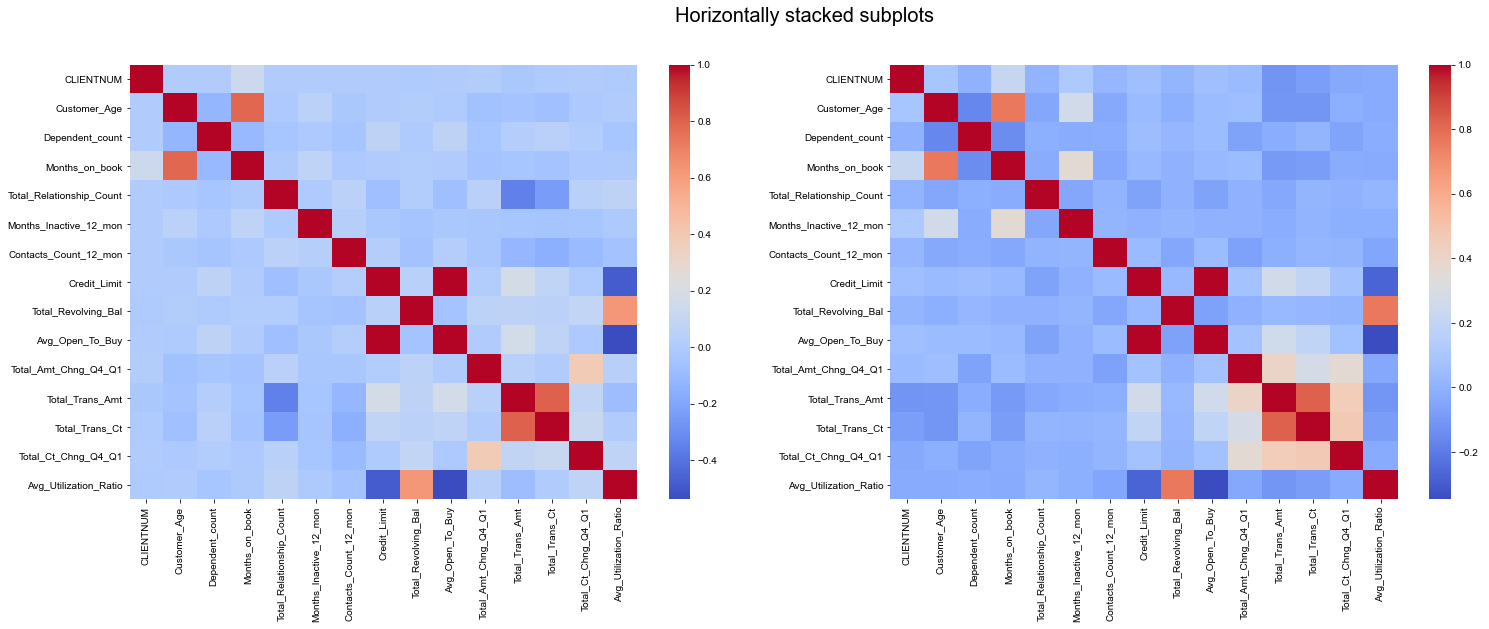

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(25, 8))
fig.suptitle('Horizontally stacked subplots', fontsize=20)
sns.heatmap(df.corr(), cmap='coolwarm',ax=axes[0]);
sns.heatmap(df_atr.corr(), cmap='coolwarm', ax=axes[1]);
sns.set(font_scale=1)

In [90]:
#Podemos utilizar as variáveis categóricas como cores nos gráficos de dispersão
categoricas = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Card_Category',
               'Income_Category']
                 

#E criar os gráficos de dispersão correlacionando as variáveis quantitativas
quantitativas = ['Customer_Age','Dependent_count','Total_Relationship_Count','Months_on_book',
                 'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit',
                 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                 'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

relacoes = [('Avg_Utilization_Ratio', 'Credit_Limit'), ('Avg_Open_To_Buy', 'Credit_Limit'),
           ('Credit_Limit','Card_Category'), ('Months_on_book','Credit_Limit'),
           ('Income_Category','Credit_Limit'), ('Income_Category','Education_Level'),
           ('Education_Level','Credit_Limit')]

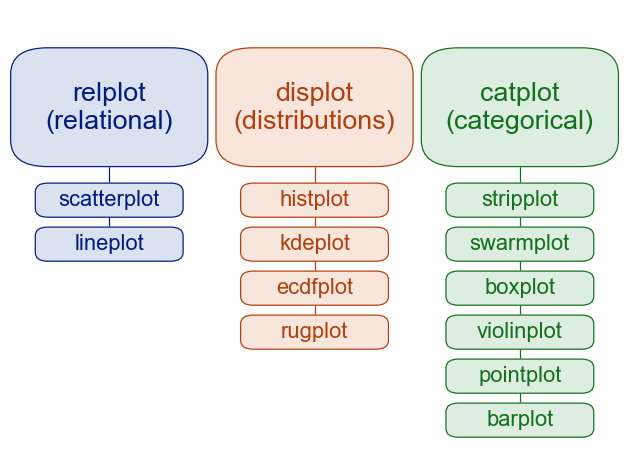

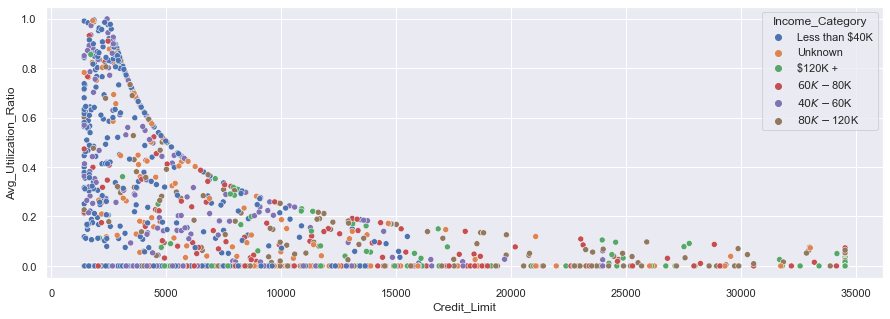

In [91]:
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = relacoes[0]
categoria = categoricas[-1]
sns.scatterplot(x=quantitativa_x, y=quantitativa_y, data=df_atr, hue=categoria)
plt.ylabel(quantitativa_y);
plt.xlabel(quantitativa_x);

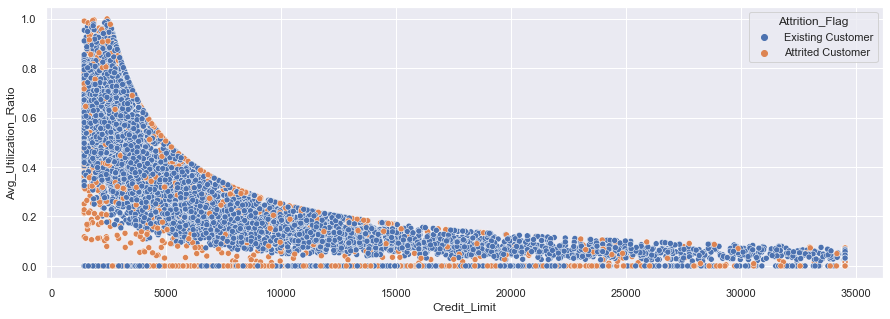

In [92]:
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = relacoes[0]
categoria = categoricas[-1]
sns.scatterplot(x=quantitativa_x, y=quantitativa_y, data=df, hue='Attrition_Flag')
plt.ylabel(quantitativa_y);
plt.xlabel(quantitativa_x);

Observamos que diversos clientes desistentes estão com média de utilização igual a 0. O percentual de clientes desistentes que não estavam utilizando o cartão é de:

In [93]:
df_atr[df_atr['Avg_Utilization_Ratio'] == 0].count()[0]/df_atr.count()[0]*100

54.88629379225568

### Clientes desistentes por tipo de cartão

No dataframe todo:

In [ ]:
df1 = pd.DataFrame(df[df['Attrition_Flag'] == 'Attrited Customer'].groupby('Card_Category')['Credit_Limit'].describe()['count']).rename(columns={'count':'Nº de clientes desistentes','Card_Category':'Categoria do cartão'})
df1

,Nº de clientes desistentes
Card_Category,
Blue,1519.0
Gold,21.0
Platinum,5.0
Silver,82.0


Entre os desistentes que possuem média de utilização igual a 0:

In [ ]:
df2 = pd.DataFrame(df_atr[df_atr['Avg_Utilization_Ratio'] == 0].groupby('Card_Category')['Avg_Utilization_Ratio'].count()).rename(columns={'Avg_Utilization_Ratio':'Nº de clientes desistentes'})
df2

,Nº de clientes desistentes
Card_Category,
Blue,843
Gold,8
Platinum,2
Silver,40


Porcentagem de clientes desistentes que não utilizavam o cartão:

In [ ]:
df2/df1

,Nº de clientes desistentes
Card_Category,
Blue,0.554970
Gold,0.380952
Platinum,0.400000
Silver,0.487805


### Entendendo o limite da pessoa

Observamos que, independente do tamanho de limite de crédito do cliente, a maioria dos clientes utiliza pouco do seu limite.

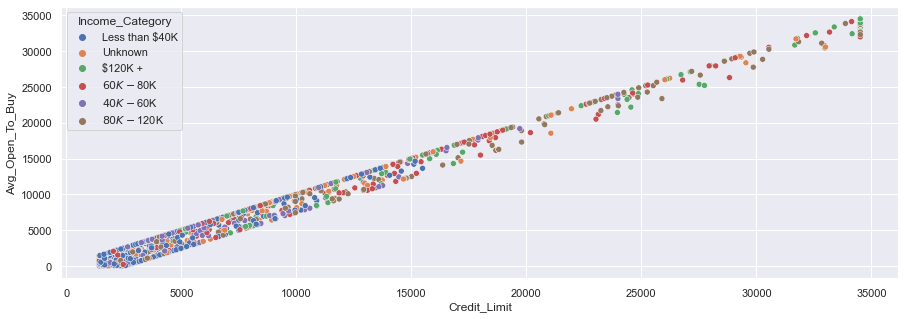

In [ ]:
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = relacoes[1]
categoria = categoricas[-1]
sns.scatterplot(x=quantitativa_x, y=quantitativa_y, data=df_atr, hue=categoria)
plt.ylabel(quantitativa_y);
plt.xlabel(quantitativa_x);

Limite não tem a ver com a categoria do cartão.

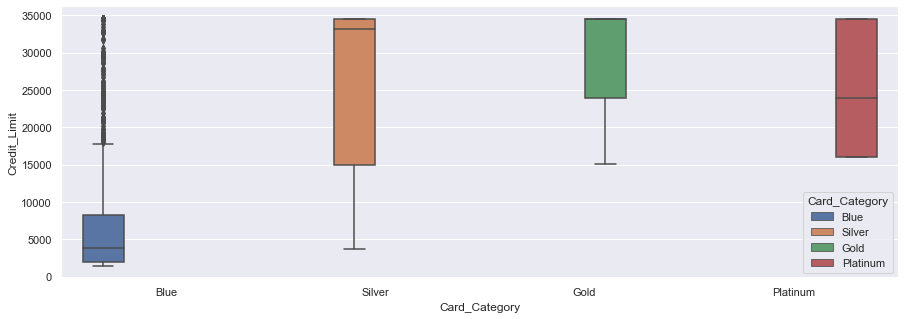

In [ ]:
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = relacoes[2]
categoria = categoricas[-2]
sns.boxplot(x=quantitativa_x, y=quantitativa_y, data=df_atr, hue=categoria)
plt.ylabel(quantitativa_y);
plt.xlabel(quantitativa_x);

Limite não tem a ver com o tempo de relacionamento com o cliente.

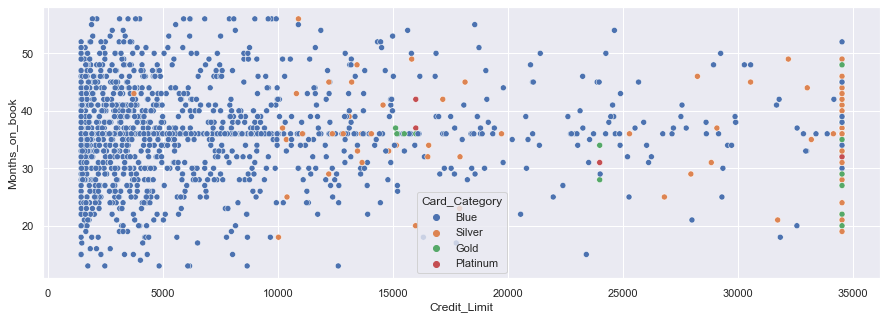

In [ ]:
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = relacoes[3]
categoria = categoricas[-2]
sns.scatterplot(x=quantitativa_x, y=quantitativa_y, data=df_atr, hue=categoria)
plt.ylabel(quantitativa_y);
plt.xlabel(quantitativa_x);

Limite tem a ver com a renda. Rendas menores possuem limite menor.

C:\Users\isbon\AppData\Local\Temp/ipykernel_9592/3981836941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atr['Income_Category'] = pd.Categorical(df_atr['Income_Category'])


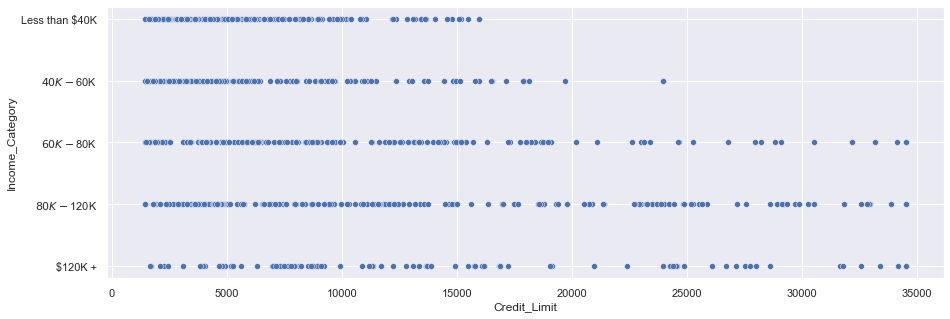

In [ ]:
order = ['NaN', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K','$120K +' ]
df_atr['Income_Category'] = pd.Categorical(df_atr['Income_Category'])
df4 = df_atr.sort_values(by=['Income_Category']).copy()
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = relacoes[4]
categoria = categoricas[-2]
sns.scatterplot(x=quantitativa_x, y=quantitativa_y, data=df4)
plt.ylabel(quantitativa_y);
plt.xlabel(quantitativa_x);

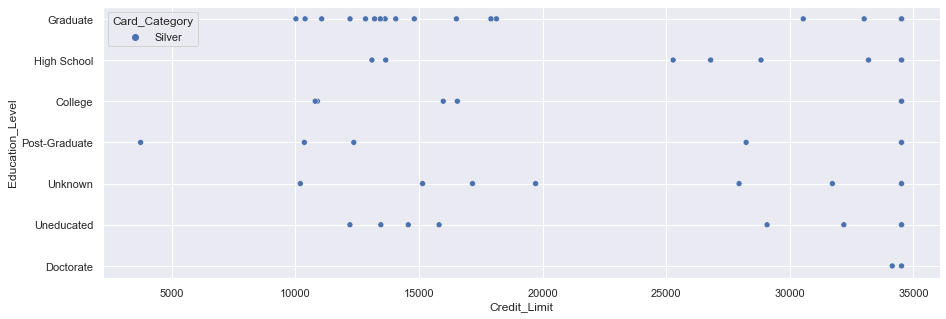

In [ ]:
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = relacoes[6]
categoria = categoricas[-2]
sns.scatterplot(x=quantitativa_x, y=quantitativa_y, data=df_atr[df_atr['Card_Category']=='Silver'], hue=categoria)
plt.ylabel(quantitativa_y);
plt.xlabel(quantitativa_x);

### Relação entre escolaridade e renda

In [ ]:
df3 = pd.pivot_table(data=df_atr, index=['Income_Category'], columns=['Education_Level'], values=['CLIENTNUM'],aggfunc='count', margins=1)
df3

CLIENTNUM                                               \
Education_Level   College Doctorate Graduate High School Post-Graduate   
Income_Category                                                          
$120K +                12         8       32          28             4   
$40K - $60K            24        11       77          51            17   
$60K - $80K            17         7       52          42            16   
$80K - $120K           36        11       67          41            17   
Less than $40K         49        42      210         101            34   
Unknown                16        16       49          43             4   
All                   154        95      487         306            92   

                                          
Education_Level Uneducated Unknown   All  
Income_Category                           
$120K +                 23      19   126  
$40K - $60K             41      50   271  
$60K - $80K             24      31   189  
$80K - $120K            37      33   242  
Less than $40K          80      96   612  
Unknown                 32      27   187  
All                    237     256  1627

In [ ]:
df3.reset_index()

Income_Category CLIENTNUM                                 \
Education_Level                   College Doctorate Graduate High School   
0                       $120K +        12         8       32          28   
1                   $40K - $60K        24        11       77          51   
2                   $60K - $80K        17         7       52          42   
3                  $80K - $120K        36        11       67          41   
4                Less than $40K        49        42      210         101   
5                       Unknown        16        16       49          43   
6                           All       154        95      487         306   

                                                        
Education_Level Post-Graduate Uneducated Unknown   All  
0                           4         23      19   126  
1                          17         41      50   271  
2                          16         24      31   189  
3                          17         37      33   242  
4                          34         80      96   612  
5                           4         32      27   187  
6                          92        237     256  1627

# Outras análises

### Porcentagem de clientes desistentes por tipo de cartão

In [ ]:
df[df['Attrition_Flag'] == 'Attrited Customer'].groupby('Card_Category')['Credit_Limit'].describe()['count']/df.groupby('Card_Category')['Credit_Limit'].describe()['count']*100

Card_Category
Blue        16.097923
Gold        18.103448
Platinum    25.000000
Silver      14.774775
Name: count, dtype: float64

### Média da utilização do cartão de clientes desistentes por tipo de cartão

In [ ]:
df[df['Attrition_Flag'] == 'Attrited Customer'].groupby('Card_Category')['Avg_Utilization_Ratio'].mean()

Card_Category
Blue        0.171740
Gold        0.036286
Platinum    0.010400
Silver      0.032439
Name: Avg_Utilization_Ratio, dtype: float64

# Tratando dados

In [ ]:
df.replace('Unknown', np.nan, inplace=True) #NaN
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# Anotações internas

**Tipos de análise**
1. Analisar o dataframe todo
2.  Analisar o dataframe de desistentes
3. Analisar os desistentes em relação ao todo


**Análises pendentes**
1. Categoria do cartão vs. renda
2. Categoria do cartão vs. escolaridade
3. Months_Inactive_12_mon tem relação com categoria de cartão
4. Attrition_Flag com Months_Inactive_12_mon
5. Total_Relationship_Count com categoria de cartão
6. Months_Inactive_12_mon tem tendência a cancelar? 
7. Avg_Utilization_Ratio - ver no dataframe inteiro
8. Análise do tempo de permanência das pessoas que saíram

Se Avg_Utilization_Ratio for importante, ver relação com dependentes, tipo de cartão, renda, gênero, escolaridade.

**Pesquisar:**
1. Gráfico de colunas agrupadas


**Racional de cálculo:**
1. Total_Revolving_Bal = Credit_Limit - Avg_Open_To_Buy
2. Avg_Utilization_Ratio = Total_Revolving_Bal/Credit_Limit
3. Total_Amt_Chng_Q4_Q1: Total_Amt_Q4/Total_Amt_Q1 (não temos no dataframe)